In [1]:
import requests, json, time, re
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB

In [2]:
reddit = pd.read_csv('./datasets/reddit_2.csv')

In [3]:
reddit.head()

,text,is_tifu
0,TIFU by buying everyone an AncestryDNA kit and...,1
1,TIFU by living in a dark bedroom for 6 years. ...,1
2,TIFU by spending the last year on reddit talki...,1
3,TIFU: I have officially branded myself as the ...,1
4,/r/tifu last weekend,1


In [4]:
reddit['text'] = reddit.text.map(lambda x: re.sub('\s[\/]?r\/[^s]+', ' ', x))
reddit['text'] = reddit.text.map(lambda x: re.sub('http[s]?:\/\/[^\s]*', ' ', x))
reddit['text'] = reddit.text.map(lambda x: re.sub('(AITA|TIFU|tl|dr|tldr|y|asshole|wibta)[s]?', ' ', x, flags=re.I))

In [5]:
reddit.head()

,text,is_tifu
0,b bu ing ever one an Ancestr DNA kit and ru...,1
1,b living in a dark be oom for 6 ears. The ...,1
2,b spending the last ear on reddit talking ...,1
3,: I have officiall branded m elf as the bigg...,1
4,/r/ last weekend,1


In [6]:
X = reddit.drop('is_tifu', axis=1)
y = reddit['is_tifu']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=24)

In [8]:
tfidf = TfidfVectorizer(stop_words='english', max_df=.95, min_df=5)

In [9]:
train_raw = tfidf.fit_transform(X_train['text'])

In [10]:
train_raw

<2762x7460 sparse matrix of type '<class 'numpy.float64'>'
	with 337605 stored elements in Compressed Sparse Row format>

In [11]:
train_df = pd.SparseDataFrame(train_raw, columns=tfidf.get_feature_names())

train_df.head(10)

,00,000,00am,00pm,10,100,1000,100k,10am,10pm,...,xbox,xd,xmas,zealand,zed,zero,zip,zombie,zone,zoo
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,0.034681,0.044648,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
train_df.fillna(0, inplace=True)

In [13]:
train_df.isnull().sum().sum()

0

In [14]:
test_raw = tfidf.transform(X_test['text'])
test_df = pd.SparseDataFrame(test_raw, columns=tfidf.get_feature_names())
test_df.fillna(0, inplace=True)
test_df.head()

,00,000,00am,00pm,10,100,1000,100k,10am,10pm,...,xbox,xd,xmas,zealand,zed,zero,zip,zombie,zone,zoo
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
params = {"min_samples_split": [12, 25, 40]}

In [16]:
rf = RandomForestClassifier(n_estimators=100)

In [17]:
gs = GridSearchCV(rf, param_grid=params, return_train_score=True, cv=5)

In [18]:
gs.fit(train_df, y_train)
gs.score(train_df, y_train)

0.998551774076756

In [19]:
gs.score(test_df, y_test)

0.8944256756756757

In [20]:
gs.best_params_

{'min_samples_split': 25}

In [21]:
gs.best_estimator_.feature_importances_

array([4.01061343e-05, 1.75025697e-04, 0.00000000e+00, ...,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00])

In [22]:
feat_importance = pd.DataFrame(gs.best_estimator_.feature_importances_, train_df.columns, columns=['importance'])

In [23]:
feat_importance.sort_values(by='importance', ascending=False).head(20)

,importance
happened,0.027845
told,0.017936
don,0.014161
said,0.012727
want,0.011070
fuck,0.010818
toda,0.010549
sa,0.006691
upset,0.006306
asked,0.006297


In [24]:
feat_importance.sort_values(by='importance', ascending=False).tail(20)

,importance
plot,0.0
crawling,0.0
plugged,0.0
plugging,0.0
plumbing,0.0
crawled,0.0
crawl,0.0
pms,0.0
po,0.0
craving,0.0


Text(0, 0.5, 'Feature')

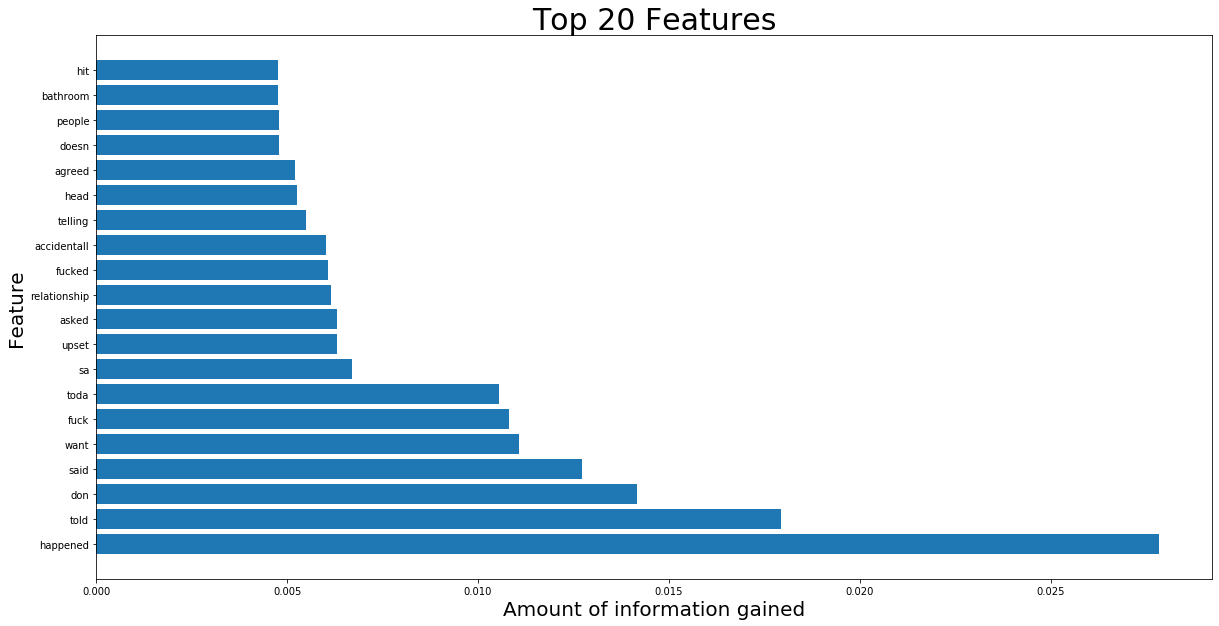

In [25]:
plt.figure(figsize=(20,10))
temp = feat_importance.sort_values('importance', ascending=False).head(20)
plt.barh(temp.index, temp['importance'])
plt.title('Top 20 Features', fontsize=30)
plt.xlabel('Amount of information gained', fontsize=20)
plt.ylabel('Feature', fontsize=20)

In [32]:
svc = SVC(kernel='linear', gamma='scale')
svc.fit(train_df, y_train)

svc.score(train_df, y_train)

0.9855177407675597

In [38]:
svc.score(test_df, y_test)

0.9087837837837838

In [39]:
feat_importance = pd.DataFrame(np.transpose(svc.coef_), train_df.columns, columns=['importance'])

In [40]:
feat_importance.sort_values(by='importance', ascending=False).head(20)

,importance
happened,3.669197
toda,2.844408
fucked,2.456694
accidentall,2.293293
fuck,2.271517
actuall,1.984549
fu,1.744568
head,1.715510
idea,1.709027
thinking,1.684015


In [41]:
feat_importance.sort_values(by='importance', ascending=False).tail(20)

,importance
uncomfortable,-1.382643
feel,-1.393653
wedding,-1.419365
calling,-1.433464
rude,-1.441902
upset,-1.469937
pissed,-1.492515
mad,-1.498833
agreed,-1.510044
sa,-1.510325


In [28]:
mnb = MultinomialNB()

mnb.fit(train_df, y_train)

mnb.score(train_df, y_train)

0.9275887038377987

In [29]:
mnb.score(test_df, y_test)

0.8673986486486487

In [42]:
feat_importance = pd.DataFrame(np.transpose(mnb.coef_), train_df.columns, columns=['importance'])

In [43]:
feat_importance.sort_values(by='importance', ascending=False).head(20)

,importance
ou,-5.906097
just,-6.096030
like,-6.205716
ing,-6.326904
got,-6.375115
da,-6.394609
time,-6.449960
didn,-6.455815
thing,-6.488974
happened,-6.543088


In [44]:
feat_importance.sort_values(by='importance', ascending=False).tail(20)

,importance
grandchild,-9.897617
granddaughter,-9.897617
spoil,-9.897617
reiterate,-9.897617
splitting,-9.897617
bridesmaid,-9.897617
ultimatum,-9.897617
handicap,-9.897617
unbiased,-9.897617
chore,-9.897617
